In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('mos5years.xls', skiprows=6)
data.index = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)
#plt.plot(data.index, data['T'])


last_day = pd.Timestamp(day=1, month=1, year=2019)
first_day = pd.Timestamp(day=1, month=12, year=2017)

data_filter = data[(data.index < last_day) & (data.index >= first_day)]
#plt.plot(data_filter.index, data_filter['T'])
#data_filter
#plt.plot(data_filter.index, data_filter['T'])
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [ ]:
data = data_filter

In [38]:
data['time'] = data.index
data = data.sort_values('time')
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'time'],
      dtype='object')

In [37]:
data['time'].dt.hour

Местное время в Москве (ВДНХ)
2015-01-01 00:00:00     0
2015-01-01 01:00:00     1
2015-01-01 02:00:00     2
2015-01-01 03:00:00     3
2015-01-01 04:00:00     4
                       ..
2020-01-01 09:00:00     9
2020-01-01 12:00:00    12
2020-01-01 15:00:00    15
2020-01-01 18:00:00    18
2020-01-01 21:00:00    21
Name: time, Length: 17647, dtype: int64

In [34]:
data_daily = data[data['time'].dt.hour == 12]
data_daily['time'].dt.hour

Местное время в Москве (ВДНХ)
2015-01-01 12:00:00    12
2015-01-02 12:00:00    12
2015-01-03 12:00:00    12
2015-01-04 12:00:00    12
2015-01-05 12:00:00    12
                       ..
2019-12-28 12:00:00    12
2019-12-29 12:00:00    12
2019-12-30 12:00:00    12
2019-12-31 12:00:00    12
2020-01-01 12:00:00    12
Name: time, Length: 1826, dtype: int64

In [43]:
data_daily['T'].min()

-26.9

In [44]:
data_daily['T'].max()

31.7

In [45]:
data_daily['T'].mean()

8.772836801752456

In [46]:
data_daily.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg
count,1826.000000,1826.000000,1826.000000,1815.000000,1825.000000,1826.000000,19.000000,86.000000,0.0,0.0,1820.000000,1825.000000,0.0,0.0
mean,8.772837,747.612103,762.026177,0.021543,65.252055,1.570646,10.421053,11.046512,NaN,NaN,8.523187,1.607507,NaN,NaN
std,10.986743,7.655981,7.868374,0.912714,20.220360,0.801159,0.606977,1.264046,NaN,NaN,2.664971,8.619287,NaN,NaN
min,-26.900000,718.200000,732.400000,-5.200000,14.000000,0.000000,10.000000,10.000000,NaN,NaN,0.200000,-30.500000,NaN,NaN
25%,0.400000,742.600000,756.900000,-0.500000,49.000000,1.000000,10.000000,10.000000,NaN,NaN,10.000000,-4.200000,NaN,NaN
50%,8.050000,747.500000,761.800000,0.000000,68.000000,1.000000,10.000000,11.000000,NaN,NaN,10.000000,1.100000,NaN,NaN
75%,18.500000,752.500000,766.900000,0.500000,83.000000,2.000000,11.000000,12.000000,NaN,NaN,10.000000,8.700000,NaN,NaN
max,31.700000,774.100000,789.100000,4.900000,100.000000,5.000000,12.000000,14.000000,NaN,NaN,10.000000,19.900000,NaN,NaN


In [47]:
data_daily['T'].rolling(100).mean()

Местное время в Москве (ВДНХ)
2015-01-01 12:00:00      NaN
2015-01-02 12:00:00      NaN
2015-01-03 12:00:00      NaN
2015-01-04 12:00:00      NaN
2015-01-05 12:00:00      NaN
                       ...  
2019-12-28 12:00:00    5.193
2019-12-29 12:00:00    5.050
2019-12-30 12:00:00    4.919
2019-12-31 12:00:00    4.849
2020-01-01 12:00:00    4.768
Name: T, Length: 1826, dtype: float64

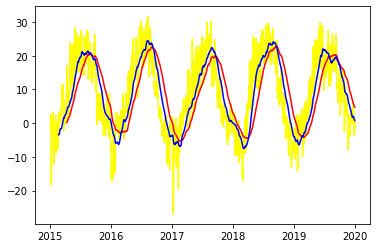

In [53]:
plt.plot(data_daily.index, data_daily['T'], color='yellow')
plt.plot(data_daily.index, data_daily['T'].rolling(100).mean(), color='red')
plt.plot(data_daily.index, data_daily['T'].rolling(50).mean(), color='blue')



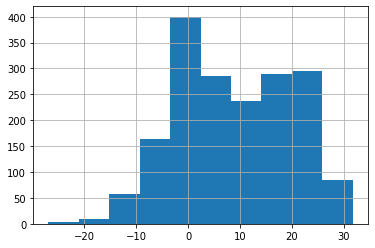

In [55]:
data_daily['T'].hist()

In [58]:
data_daily['T'].quantile(0.95)

25.575000000000003